In [1]:
# Ignore  the warnings
import warnings
warnings.filterwarnings('always')
warnings.filterwarnings('ignore')

# data visualisation and manipulation
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import style
import seaborn as sns

# encodage des mots en Int
from numpy import array
from numpy import argmax
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
 
#configure
# sets matplotlib to inline and displays graphs below the corressponding cell.
%matplotlib inline  
style.use('fivethirtyeight')
sns.set(style='whitegrid',color_codes=True)

#model selection
from sklearn.decomposition import NMF
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score,precision_score,recall_score,confusion_matrix,roc_curve,roc_auc_score
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import LabelEncoder

#preprocess.
from keras.preprocessing.image import ImageDataGenerator

#dl libraraies
import keras
from keras import backend as K
from keras.models import Sequential
from keras.layers import Dense , merge
from keras.optimizers import Adam,SGD,Adagrad,Adadelta,RMSprop
from keras.utils import to_categorical
from keras.utils.vis_utils import model_to_dot
from keras.callbacks import ReduceLROnPlateau


from keras.layers.merge import dot
from keras.models import Model


# specifically for deeplearning.
from keras.layers import Dropout, Flatten,Activation,Input,Embedding
from keras.layers import Conv2D, MaxPooling2D, BatchNormalization
import tensorflow as tf
import random as rn
from IPython.display import SVG
 
# specifically for manipulating zipped images and getting numpy arrays of pixel values of images.
#import cv2 # erreur import
import numpy as np  
from tqdm import tqdm
import os                   
from random import shuffle  
from zipfile import ZipFile
from PIL import Image

#TL pecific modules
from keras.applications.vgg16 import VGG16

# pour parser le fichier train.json
import json

Using TensorFlow backend.


In [2]:
with open('train.json', 'r') as f:
    datas = json.load(f) # id, cuisine, ingredients[]

csv = []
occurence = dict()
for data in datas:
    for ingredient in data['ingredients']:
        cuisine = data['cuisine']
        
        # Ajout de la ligne id-cuisine-ingredient
        tmp = dict()
        tmp['id'] = str(data['id'])
        tmp['cuisine'] = cuisine
        tmp['ingredient'] = ingredient
        csv.append(tmp)
        
        # Comptage de l'occurence
        if not cuisine in occurence:
            occurence[cuisine] = dict()
        if not ingredient in occurence[cuisine]:
            occurence[cuisine][ingredient] = 0
        occurence[cuisine][ingredient] += 1

# Ajout des occurences dans le CSV
for ligne in csv:
    cuisine = ligne['cuisine']
    ingredient = ligne['ingredient']
    ligne['occurence'] = occurence[cuisine][ingredient]


# $ingredients contient tous les ingredients possibles


train = pd.DataFrame(csv)

In [3]:
df = train.copy()

In [4]:
df.head()

,cuisine,id,ingredient,occurence
0,greek,10259,romaine lettuce,39
1,greek,10259,black olives,31
2,greek,10259,grape tomatoes,26
3,greek,10259,garlic,216
4,greek,10259,pepper,203


In [5]:
# Encodage des valeurs

#le_cuisine = LabelEncoder()
#le_ingredient = LabelEncoder()

#df['cuisine'] = le_cuisine.fit_transform(df['cuisine'])
#df['ingredient'] = le_ingredient.fit_transform(df['ingredient'])

# Pour inverser l'encodage il faudra utiliser ces deux lignes :
#df['cuisine'] = le_cuisine.inverse_transform(df['cuisine'])
#df['ingredient'] = le_ingredient.inverse_transform(df['ingredient'])

#df.head()

In [6]:
df['cuisine'].unique()

array(['greek', 'southern_us', 'filipino', 'indian', 'jamaican',
       'spanish', 'italian', 'mexican', 'chinese', 'british', 'thai',
       'vietnamese', 'cajun_creole', 'brazilian', 'french', 'japanese',
       'irish', 'korean', 'moroccan', 'russian'], dtype=object)

In [7]:
len(df['cuisine'].unique())

20

In [8]:
df['ingredient'].unique()

array(['romaine lettuce', 'black olives', 'grape tomatoes', ...,
       'lop chong', 'tomato garlic pasta sauce',
       'crushed cheese crackers'], dtype=object)

In [9]:
len(df['ingredient'].unique())

6714

In [10]:
# Pour verifier que toutes les donnees sont bonnes
df['cuisine'].isnull().sum()

0

In [11]:
# Pour verifier que toutes les donnees sont bonnes
df['ingredient'].isnull().sum()

0

In [12]:
# Creation de la matrix

index = list(df['cuisine'].unique())
columns = list(df['ingredient'].unique())
index = sorted(index)
columns = sorted(columns)

print(index)
print(columns)
 
util_df = pd.pivot_table(data = df, values = 'occurence', index = 'cuisine', columns = 'ingredient')

['brazilian', 'british', 'cajun_creole', 'chinese', 'filipino', 'french', 'greek', 'indian', 'irish', 'italian', 'jamaican', 'japanese', 'korean', 'mexican', 'moroccan', 'russian', 'southern_us', 'spanish', 'thai', 'vietnamese']
['(    oz.) tomato sauce', '(   oz.) tomato paste', '(10 oz.) frozen chopped spinach', '(10 oz.) frozen chopped spinach, thawed and squeezed dry', '(14 oz.) sweetened condensed milk', '(14.5 oz.) diced tomatoes', '(15 oz.) refried beans', '1% low-fat buttermilk', '1% low-fat chocolate milk', '1% low-fat cottage cheese', '1% low-fat milk', '2 1/2 to 3 lb. chicken, cut into serving pieces', '2% low fat cheddar chees', '2% low-fat cottage cheese', '2% lowfat greek yogurt', '2% milk shredded mozzarella cheese', '2% reduced-fat milk', '25% less sodium chicken broth', '33% less sodium cooked deli ham', '33% less sodium cooked ham', '33% less sodium ham', '33% less sodium smoked fully cooked ham', '40% less sodium taco seasoning', '40% less sodium taco seasoning mix',

In [13]:
util_df

ingredient,( oz.) tomato sauce,( oz.) tomato paste,(10 oz.) frozen chopped spinach,"(10 oz.) frozen chopped spinach, thawed and squeezed dry",(14 oz.) sweetened condensed milk,(14.5 oz.) diced tomatoes,(15 oz.) refried beans,1% low-fat buttermilk,1% low-fat chocolate milk,1% low-fat cottage cheese,...,yukon gold potatoes,yuzu,yuzu juice,za'atar,zest,zesty italian dressing,zinfandel,ziti,zucchini,zucchini blossoms
cuisine,,,,,,,,,,,,,,,,,,,,,
brazilian,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0,NaN
british,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,8.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0,NaN
cajun_creole,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13.0,NaN
chinese,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,30.0,NaN
filipino,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.0,NaN
french,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,...,41.0,NaN,NaN,NaN,NaN,NaN,5.0,NaN,86.0,NaN
greek,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,...,4.0,NaN,NaN,NaN,2.0,1.0,2.0,3.0,47.0,NaN
indian,NaN,2.0,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,...,27.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,42.0,NaN
irish,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,NaN,NaN,...,24.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0,NaN


In [14]:
util_df = util_df.fillna(0)
util_df

ingredient,( oz.) tomato sauce,( oz.) tomato paste,(10 oz.) frozen chopped spinach,"(10 oz.) frozen chopped spinach, thawed and squeezed dry",(14 oz.) sweetened condensed milk,(14.5 oz.) diced tomatoes,(15 oz.) refried beans,1% low-fat buttermilk,1% low-fat chocolate milk,1% low-fat cottage cheese,...,yukon gold potatoes,yuzu,yuzu juice,za'atar,zest,zesty italian dressing,zinfandel,ziti,zucchini,zucchini blossoms
cuisine,,,,,,,,,,,,,,,,,,,,,
brazilian,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0
british,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,8.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0
cajun_creole,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,13.0,0.0
chinese,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,30.0,0.0
filipino,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6.0,0.0
french,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,...,41.0,0.0,0.0,0.0,0.0,0.0,5.0,0.0,86.0,0.0
greek,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,4.0,0.0,0.0,0.0,2.0,1.0,2.0,3.0,47.0,0.0
indian,0.0,2.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,27.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,42.0,0.0
irish,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,...,24.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0


In [85]:
X = util_df
model = NMF(n_components=20, init='random', random_state=0)
W = model.fit_transform(X)
H = model.components_

In [86]:
W = pd.DataFrame(W, index, ["type_" + str(i+1) for i in range(len(W[0]))])
H = pd.DataFrame(H, ["type_" + str(i+1) for i in range(len(H))], columns)

In [87]:
print(W)
print(H)
# On peut utiliser sklearn mds pour représenter les ingrédients
# et les cuisines sur une carte 2D en calculant les distances

                 type_1     type_2     type_3    type_4    type_5    type_6  \
brazilian      0.358365   0.000000   0.000000  0.194559  0.008764  0.013867   
british        0.080611   0.277425   0.000000  0.000000  0.000000  0.000000   
cajun_creole   0.812923   0.000000   0.000000  0.000000  0.000000  0.005815   
chinese        0.151120   0.000000  10.011724  0.000000  0.000000  0.000000   
filipino       0.000000   0.000000   0.179871  0.000000  0.000000  0.007501   
french         1.310420   0.000000   0.000000  0.000000  0.007064  0.000000   
greek          0.356595   0.000000   0.000000  0.000065  0.000946  0.000000   
indian         1.627844   0.000000   0.000000  0.000000  0.000000  0.000000   
irish          0.000000   0.000000   0.000000  0.000000  0.001143  0.002838   
italian       14.554653  28.826764   0.000000  0.000000  0.000000  0.000000   
jamaican       0.001463   0.000000   0.000000  0.466276  0.000000  0.000000   
japanese       0.011788   0.000000   0.000000  0.000

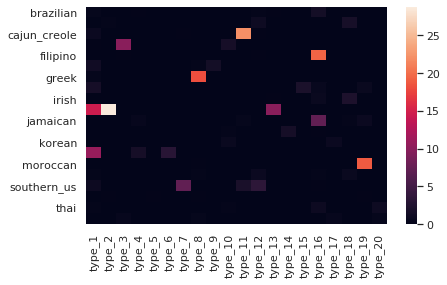

In [88]:
ax = sns.heatmap(W)

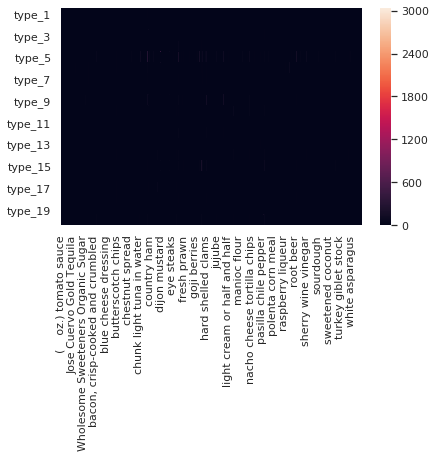

In [89]:
ay = sns.heatmap(H)

In [90]:
print(index) # cuisines
print(columns) # ingrédients

['brazilian', 'british', 'cajun_creole', 'chinese', 'filipino', 'french', 'greek', 'indian', 'irish', 'italian', 'jamaican', 'japanese', 'korean', 'mexican', 'moroccan', 'russian', 'southern_us', 'spanish', 'thai', 'vietnamese']
['(    oz.) tomato sauce', '(   oz.) tomato paste', '(10 oz.) frozen chopped spinach', '(10 oz.) frozen chopped spinach, thawed and squeezed dry', '(14 oz.) sweetened condensed milk', '(14.5 oz.) diced tomatoes', '(15 oz.) refried beans', '1% low-fat buttermilk', '1% low-fat chocolate milk', '1% low-fat cottage cheese', '1% low-fat milk', '2 1/2 to 3 lb. chicken, cut into serving pieces', '2% low fat cheddar chees', '2% low-fat cottage cheese', '2% lowfat greek yogurt', '2% milk shredded mozzarella cheese', '2% reduced-fat milk', '25% less sodium chicken broth', '33% less sodium cooked deli ham', '33% less sodium cooked ham', '33% less sodium ham', '33% less sodium smoked fully cooked ham', '40% less sodium taco seasoning', '40% less sodium taco seasoning mix',

In [91]:
def avg_recette(tab):
    sortie = pd.Series([0.0 for i in range(len(H))], ["type_" + str(i+1) for i in range(len(H))])
    for ingr in tab:
        sortie += ingr
    sortie /= len(tab)
    return sortie

def avg_recette_bis(tab):
    return np.mean(tab, axis=0)

def get_tab_recette(id):
    print(id)
    ingredients = df.loc[(df['id'] == id)]['ingredient']
    tab = [H[ingr] for ingr in ingredients]
    return tab


In [92]:
# SELECT * FROM df WHERE df.id = '10259'
df.loc[(df['id'] == '10259')]

,cuisine,id,ingredient,occurence
0,greek,10259,romaine lettuce,39
1,greek,10259,black olives,31
2,greek,10259,grape tomatoes,26
3,greek,10259,garlic,216
4,greek,10259,pepper,203
5,greek,10259,purple onion,186
6,greek,10259,seasoning,3
7,greek,10259,garbanzo beans,23
8,greek,10259,feta cheese crumbles,252


In [93]:
# Création d'une liste des id de plats
id_plats = df['id'].unique()
id_plats

array(['10259', '25693', '20130', ..., '2238', '41882', '2362'],
      dtype=object)

In [94]:
recette = get_tab_recette(id_plats[0])
test_recette = avg_recette(recette)
test_recette_bis = avg_recette_bis(recette)
print(test_recette)
print(test_recette_bis)

10259
type_1      18.272062
type_2       1.497570
type_3       5.712160
type_4      12.576533
type_5     252.514925
type_6      37.181071
type_7      10.686428
type_8       5.575425
type_9      20.253683
type_10     29.255237
type_11      2.452175
type_12      1.260802
type_13      3.327311
type_14     11.996654
type_15     45.475528
type_16      2.921365
type_17     32.942586
type_18      5.087593
type_19      1.939614
type_20     44.545144
dtype: float64
[ 18.2720619    1.49757022   5.71215979  12.57653334 252.51492539
  37.18107118  10.68642791   5.57542517  20.2536827   29.25523712
   2.4521747    1.26080246   3.32731119  11.9966541   45.47552778
   2.92136525  32.94258594   5.08759302   1.93961438  44.54514364]


In [95]:
print(W)

                 type_1     type_2     type_3    type_4    type_5    type_6  \
brazilian      0.358365   0.000000   0.000000  0.194559  0.008764  0.013867   
british        0.080611   0.277425   0.000000  0.000000  0.000000  0.000000   
cajun_creole   0.812923   0.000000   0.000000  0.000000  0.000000  0.005815   
chinese        0.151120   0.000000  10.011724  0.000000  0.000000  0.000000   
filipino       0.000000   0.000000   0.179871  0.000000  0.000000  0.007501   
french         1.310420   0.000000   0.000000  0.000000  0.007064  0.000000   
greek          0.356595   0.000000   0.000000  0.000065  0.000946  0.000000   
indian         1.627844   0.000000   0.000000  0.000000  0.000000  0.000000   
irish          0.000000   0.000000   0.000000  0.000000  0.001143  0.002838   
italian       14.554653  28.826764   0.000000  0.000000  0.000000  0.000000   
jamaican       0.001463   0.000000   0.000000  0.466276  0.000000  0.000000   
japanese       0.011788   0.000000   0.000000  0.000

In [ ]:
# faire une fonction qui multiplie les valeurs d'une recette avec les max des types de cuisine